## Explore a univariate linear regression using the diabetes dataset

#### Import the required libraries

In [32]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


#### Loading the dataset

In [33]:
diabetes_x_CA, diabetes_y_CA = datasets.load_diabetes(return_X_y=True)

#### Data Exploration

In [34]:
print("Shape of X:", diabetes_x_CA.shape)
print("Shape of y:", diabetes_y_CA.shape)

Shape of X: (442, 10)
Shape of y: (442,)


#### Data Preparation

In [35]:
x_bmi_CA = diabetes_x_CA[:, np.newaxis, 2]
x_train_CA, x_test_CA, y_train_CA, y_test_CA = train_test_split(x_bmi_CA, diabetes_y_CA, test_size=0.3, random_state=42)


#### Model Training

In [36]:
model = LinearRegression()
model.fit(x_train_CA, y_train_CA)

LinearRegression()

#### Model Evaluation

In [37]:
y_train_pred_CA = model.predict(x_train_CA)
y_test_pred_CA = model.predict(x_test_CA)
train_mse_CA = mean_squared_error(y_train_CA, y_train_pred_CA)
test_mse_CA = mean_squared_error(y_test_CA, y_test_pred_CA)
train_mae_CA = mean_absolute_error(y_train_CA, y_train_pred_CA)
test_mae_CA = mean_absolute_error(y_test_CA, y_test_pred_CA)

#### Result Reporting

In [38]:
print("Model Slope:", model.coef_[0])
print("Model Intercept:", model.intercept_)
print("Train MSE:", train_mse_CA)
print("Test MSE:", test_mse_CA)
print("Train MAE:", train_mae_CA)
print("Test MAE:", test_mae_CA)

Model Slope: 988.419312489359
Model Intercept: 151.04202449316014
Train MSE: 3899.45479231627
Test MSE: 3884.936720961032
Train MAE: 51.95119946335585
Test MAE: 50.59307504375872


#### Plotting the regression line on training data

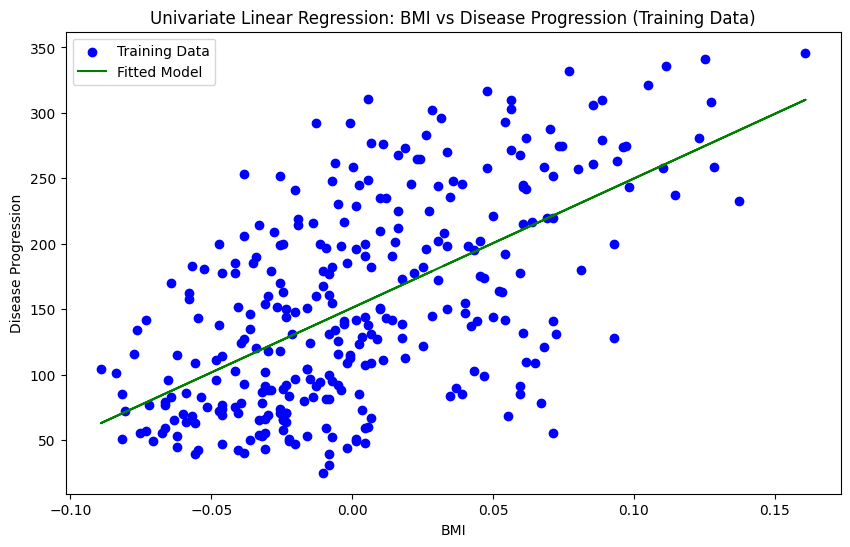

In [39]:
plt.figure(figsize=(10, 6))
plt.scatter(x_train_CA, y_train_CA, color='blue', label='Training Data')
plt.plot(x_train_CA, y_train_pred_CA, color='green', label='Fitted Model')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Univariate Linear Regression: BMI vs Disease Progression (Training Data)')
plt.legend()
plt.show()

#### Analysis:
There is a positive relationship between BMI and disease. The higher the BMI results to more disease. However there is a considerable scatter in the data points around the fitted line represents the variability in the model not captured.

#### Plotting the regression line on test data

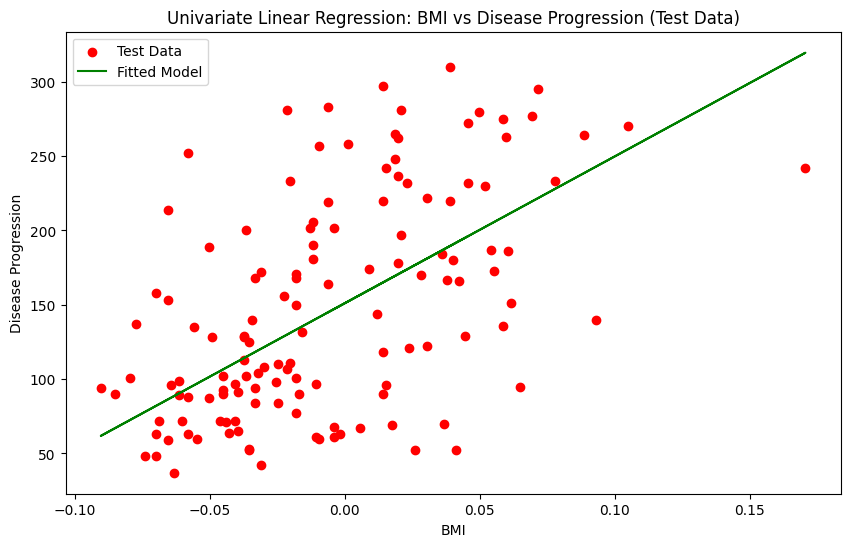

In [40]:
plt.figure(figsize=(10, 6))
plt.scatter(x_test_CA, y_test_CA, color='red', label='Test Data')
plt.plot(x_test_CA, y_test_pred_CA, color='green', label='Fitted Model')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Univariate Linear Regression: BMI vs Disease Progression (Test Data)')
plt.legend()
plt.show()


#### Analysis:
There is a positive correlation relationship between BMI and disease. The higher the BMI results to higher level of more diseases. However there is a considerable scatter in the data points around the fitted line represents the variability in the test data. Some points are close to the line represents the higher accuracy, on the other hand the scatter far points may not predict the accuracy.

#### Plotting the residuals

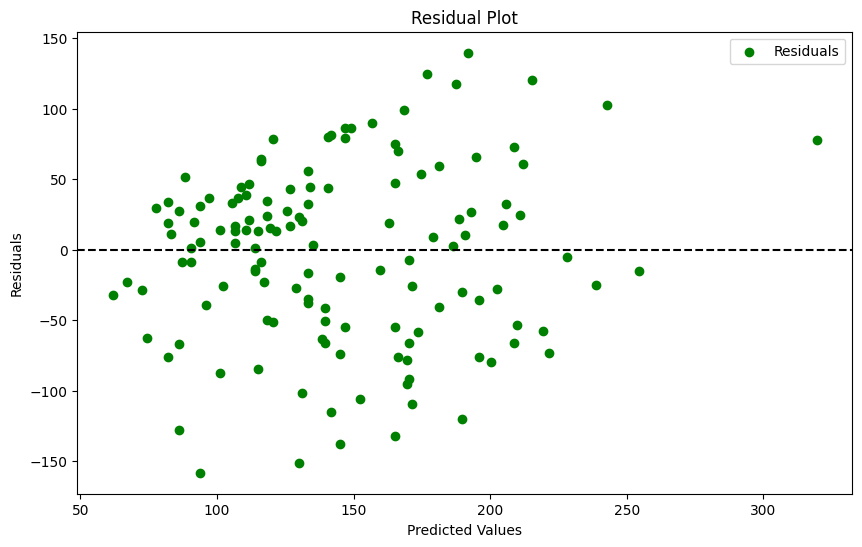

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_CA, y_test_pred_CA - y_test_CA, color='green', label='Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.legend()
plt.show()


#### Analysis:
The residual plot shows the residuals are  widely scattered around the horizontal axis, states that variance not constant. There also potiential non-linearity in the data. Overall the model may not be adequately capturing the relationship between the variables.